In [307]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [308]:
data=pd.read_csv("C:/Users/Admin/OneDrive/桌面/ds 学期B/course/6016 周一的课/project/credit_risk_dataset.csv")
df=data.copy()
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [309]:
df = df.drop_duplicates()

In [310]:
#data processing
df = df.dropna()
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [311]:
df.reset_index(inplace = True)
df

,index,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28496,32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
28497,32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
28498,32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
28499,32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [312]:
df= df.drop(df[df['person_age'] > 80].index, axis=0)

### age group

In [313]:
df['age_group'] = pd.cut(df['person_age'],
                           bins=[19, 26, 36, 46, 56, 66,81],
                           labels=['20-25', '26-35', '36-45', '46-55', '56-65','>65'])

In [314]:
df['age_group'].dtype

CategoricalDtype(categories=['20-25', '26-35', '36-45', '46-55', '56-65', '>65'], ordered=True, categories_dtype=object)

### income group

In [315]:
df['income_group'] = pd.cut(df['person_income'],
                              bins=[0, 25000, 50000, 75000, 100000, float('inf')],
                              labels=['low', 'low-middle', 'middle', 'high-middle', 'high'])

In [316]:
df['income_group']

0             middle
1                low
2                low
3             middle
4             middle
            ...     
28496         middle
28497           high
28498    high-middle
28499           high
28500     low-middle
Name: income_group, Length: 28496, dtype: category
Categories (5, object): ['low' < 'low-middle' < 'middle' < 'high-middle' < 'high']

### Loan_amount group

In [317]:
df['loan_amount_group'] = pd.cut(df['loan_amnt'],
                                   bins=[0, 5000, 10000, 15000, float('inf')],
                                   labels=['small', 'medium', 'large', 'very large'])

In [318]:
df= df.drop(df[df['person_emp_length'] > 60].index, axis=0)
df = df.drop(['index'], axis=1)
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,income_group,loan_amount_group
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20-25,low,small
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20-25,low,medium
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20-25,middle,very large
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20-25,middle,very large
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,20-25,low,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28496,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30,56-65,middle,medium
28497,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19,46-55,high,very large
28498,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28,56-65,high-middle,very large
28499,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26,46-55,high,large


In [319]:
# Create loan-to-income ratio
df['loan_to_income_ratio'] = df['loan_amnt'] / df['person_income']

# Create loan-to-employment length ratio
df['loan_to_emp_length_ratio'] =  df['person_emp_length']/ df['loan_amnt'] 

# Create interest rate-to-loan amount ratio
df['int_rate_to_loan_amt_ratio'] = df['loan_int_rate'] / df['loan_amnt']
df.reset_index(inplace = True)
df = df.drop(['index'], axis=1)
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,income_group,loan_amount_group,loan_to_income_ratio,loan_to_emp_length_ratio,int_rate_to_loan_amt_ratio
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20-25,low,small,0.104167,0.005000,0.011140
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20-25,low,medium,0.572917,0.000182,0.002340
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20-25,middle,very large,0.534351,0.000114,0.000435
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20-25,middle,very large,0.643382,0.000229,0.000408
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,20-25,low,small,0.252525,0.000800,0.002856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28489,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30,56-65,middle,medium,0.109434,0.000172,0.002269
28490,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19,46-55,high,very large,0.146875,0.000227,0.000425
28491,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28,56-65,high-middle,very large,0.460526,0.000086,0.000314
28492,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26,46-55,high,large,0.100000,0.000333,0.000765


In [320]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length', 'age_group',
       'income_group', 'loan_amount_group', 'loan_to_income_ratio',
       'loan_to_emp_length_ratio', 'int_rate_to_loan_amt_ratio'],
      dtype='object')

In [321]:
ohe_colums = ['cb_person_default_on_file','loan_grade', 'person_home_ownership','loan_intent','income_group','age_group','loan_amount_group','loan_status']

In [322]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit(df[ohe_colums])

OneHotEncoder()

In [323]:
ohe.categories_

[array(['N', 'Y'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object),
 array(['MORTGAGE', 'OTHER', 'OWN', 'RENT'], dtype=object),
 array(['DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL',
        'PERSONAL', 'VENTURE'], dtype=object),
 array(['high', 'high-middle', 'low', 'low-middle', 'middle'], dtype=object),
 array(['20-25', '26-35', '36-45', '46-55', '56-65', '>65'], dtype=object),
 array(['large', 'medium', 'small', 'very large'], dtype=object),
 array([0, 1], dtype=int64)]

In [324]:
merge_ohe_col = np.concatenate((ohe.categories_[0], 
                ohe.categories_[1],
                ohe.categories_[2],
                ohe.categories_[3],
                ohe.categories_[4],
                ohe.categories_[5],
                ohe.categories_[6],
                ohe.categories_[7],               ))

In [325]:
ohe_data = pd.DataFrame(ohe.transform(df[ohe_colums]).toarray(), columns=merge_ohe_col)
ohe_data  = pd.concat([ohe_data,df], axis=1)
df_new= ohe_data.drop(ohe_colums, axis=1)
df_new

,N,Y,A,B,C,D,E,F,G,MORTGAGE,...,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_to_income_ratio,loan_to_emp_length_ratio,int_rate_to_loan_amt_ratio
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21,9600,5.0,1000,11.14,0.10,2,0.104167,0.005000,0.011140
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,25,9600,1.0,5500,12.87,0.57,3,0.572917,0.000182,0.002340
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,23,65500,4.0,35000,15.23,0.53,2,0.534351,0.000114,0.000435
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,24,54400,8.0,35000,14.27,0.55,4,0.643382,0.000229,0.000408
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21,9900,2.0,2500,7.14,0.25,2,0.252525,0.000800,0.002856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28489,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,57,53000,1.0,5800,13.16,0.11,30,0.109434,0.000172,0.002269
28490,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,54,120000,4.0,17625,7.49,0.15,19,0.146875,0.000227,0.000425
28491,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,65,76000,3.0,35000,10.99,0.46,28,0.460526,0.000086,0.000314
28492,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,56,150000,5.0,15000,11.48,0.10,26,0.100000,0.000333,0.000765


In [326]:
df_new

,N,Y,A,B,C,D,E,F,G,MORTGAGE,...,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_to_income_ratio,loan_to_emp_length_ratio,int_rate_to_loan_amt_ratio
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21,9600,5.0,1000,11.14,0.10,2,0.104167,0.005000,0.011140
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,25,9600,1.0,5500,12.87,0.57,3,0.572917,0.000182,0.002340
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,23,65500,4.0,35000,15.23,0.53,2,0.534351,0.000114,0.000435
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,24,54400,8.0,35000,14.27,0.55,4,0.643382,0.000229,0.000408
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21,9900,2.0,2500,7.14,0.25,2,0.252525,0.000800,0.002856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28489,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,57,53000,1.0,5800,13.16,0.11,30,0.109434,0.000172,0.002269
28490,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,54,120000,4.0,17625,7.49,0.15,19,0.146875,0.000227,0.000425
28491,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,65,76000,3.0,35000,10.99,0.46,28,0.460526,0.000086,0.000314
28492,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,56,150000,5.0,15000,11.48,0.10,26,0.100000,0.000333,0.000765


In [327]:
from sklearn.preprocessing import StandardScaler

scale_cols = ['person_income','person_age','person_emp_length', 'loan_amnt','loan_int_rate','cb_person_cred_hist_length','loan_percent_income', 'loan_to_emp_length_ratio',
       'int_rate_to_loan_amt_ratio']

scaler_normal = StandardScaler()
df_new.loc[:,scale_cols] = scaler_normal.fit_transform(df_new.loc[:,scale_cols])


In [328]:
df_new.columns

Index([                         'N',                          'Y',
                                'A',                          'B',
                                'C',                          'D',
                                'E',                          'F',
                                'G',                   'MORTGAGE',
                            'OTHER',                        'OWN',
                             'RENT',          'DEBTCONSOLIDATION',
                        'EDUCATION',            'HOMEIMPROVEMENT',
                          'MEDICAL',                   'PERSONAL',
                          'VENTURE',                       'high',
                      'high-middle',                        'low',
                       'low-middle',                     'middle',
                            '20-25',                      '26-35',
                            '36-45',                      '46-55',
                            '56-65',                        '>

# 聚类分析-特征提取

In [338]:
from sklearn.decomposition import PCA

In [351]:
def Behavior(self,df_new):
    data=df_new[['A','B','C','D','E','F','G','Y','N']]
    return self.getFeature(data)

In [352]:
def getRisks(self,df_new):
    data=df_new[['20-25','26-35','36-45','46-55','56-55','>65','person_emp_length','MORTGAGE','OTHER','OWN','RENT','cb_preson_cred_hist_length']]
    return self.getFeature(data)

In [353]:
def getEconomicRisks(self,df_new):
    data=df_new[['high-middle','low','low-middle', 'middle','loan_percent_income']]
    return self.getFeature(data)

In [354]:
def loanRisk(self,df_new):
    data=df_new[[ 'DEBTCONSOLIDATION','EDUCATION','HOMEIMPROVEMENT','MEDICAL','PERSONAL','VENTURE','large','medium','small','very large','loan_rate','loan_to_income_ratio', 'loan_to_emp_length_ratio', 'int_rate_to_loan_amt_ratio']]
    return self.getFeature(data)

In [355]:
def getFeature(self,data):
    pca=PCA(n_components=1)
    data=pca.fit_transform(data)
    return data

In [356]:
Behavior(df_new)

TypeError: Behavior() missing 1 required positional argument: 'df_new'

In [370]:
class MyFeatureExtractor:
    def __init__(self):
        pass
    
    def getFeature(self, data):
        pca = PCA(n_components=1)
        data = pca.fit_transform(data)
        return data
    
    def Behavior(self, df_new):
        data = df_new[['A','B','C','D','E','F','G','Y','N']]
        return self.getFeature(data)
    
    def getRisks(self,df_new):
        data=df_new[['20-25','26-35','36-45','46-55','56-65','>65','person_emp_length','MORTGAGE','OTHER','OWN','RENT','cb_person_cred_hist_length']]
        return self.getFeature(data)

    def getEconomicRisks(self,df_new):
        data=df_new[['high-middle','low','low-middle', 'middle','loan_percent_income']]
        return self.getFeature(data)

    def loanRisk(self,df_new):
        data=df_new[[ 'DEBTCONSOLIDATION','EDUCATION','HOMEIMPROVEMENT','MEDICAL','PERSONAL','VENTURE','large','medium','small','very large','loan_int_rate','loan_to_income_ratio', 'loan_to_emp_length_ratio', 'int_rate_to_loan_amt_ratio']]
        return self.getFeature(data)

In [371]:
extractor = MyFeatureExtractor()

# 调用 Behavior 方法
result1 = extractor.Behavior(df_new)
result2 = extractor.getRisks(df_new)
result3 = extractor.getEconomicRisks(df_new)
result4 = extractor.loanRisk(df_new)

In [373]:
df = pd.DataFrame(np.concatenate([result1, result2,result3,result4], axis=1), columns=['r1', 'r2', 'r3', 'r4'])

In [374]:
df

,r1,r2,r3,r4
0,-0.391144,-0.898420,-0.631824,6.178279
1,0.315893,-1.141367,3.725817,-0.146438
2,0.315893,-1.114150,3.264206,-0.748167
3,1.411983,-0.241317,3.449638,-0.756941
4,-0.427991,-1.274943,0.758913,0.375624
...,...,...,...,...
28489,0.315893,4.212941,-0.629856,-0.149648
28490,-0.427991,2.565582,-0.212080,-1.162513
28491,-0.391144,3.929249,2.606035,-1.080619
28492,-0.391144,3.988898,-0.675659,-0.727846


C:\Users\Admin\anaconda3\envs\ML50011\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\anaconda3\envs\ML50011\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\anaconda3\envs\ML50011\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\anaconda3\envs\ML50011\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

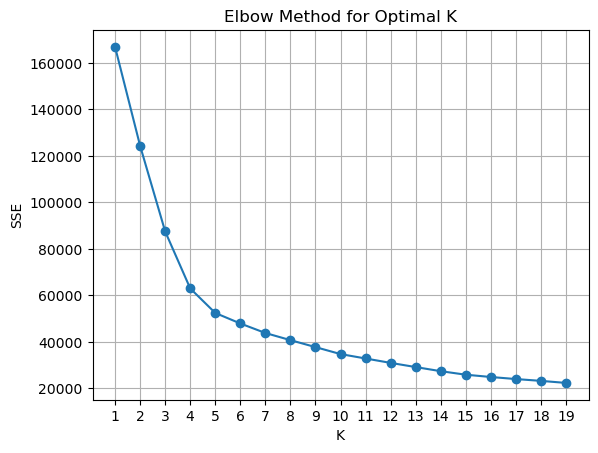

In [379]:
# 计算不同 K 值对应的 SSE
sse = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

# 绘制 SSE 与 K 值的关系图
plt.plot(range(1, 20), sse, marker='o')
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal K')
plt.xticks(np.arange(1, 20, 1))
plt.grid(True)
plt.show()

In [376]:

from sklearn.cluster import KMeans
# 假设有一个 DataFrame df 包含要进行聚类分析的数据
# 数据预处理：标准化
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# 训练 K-means 模型
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_data)

# 获取聚类标签
cluster_labels = kmeans.labels_

# 将聚类标签添加到 DataFrame 中
df['Cluster'] = cluster_labels


C:\Users\Admin\anaconda3\envs\ML50011\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [377]:
df

,r1,r2,r3,r4,Cluster
0,-0.391144,-0.898420,-0.631824,6.178279,0
1,0.315893,-1.141367,3.725817,-0.146438,1
2,0.315893,-1.114150,3.264206,-0.748167,1
3,1.411983,-0.241317,3.449638,-0.756941,1
4,-0.427991,-1.274943,0.758913,0.375624,3
...,...,...,...,...,...
28489,0.315893,4.212941,-0.629856,-0.149648,4
28490,-0.427991,2.565582,-0.212080,-1.162513,4
28491,-0.391144,3.929249,2.606035,-1.080619,4
28492,-0.391144,3.988898,-0.675659,-0.727846,4


In [380]:
result = df.groupby('Cluster').mean()
result

,r1,r2,r3,r4
Cluster,,,,
0,0.161339,0.224574,-1.071541,3.616022
1,-0.217239,-0.321928,1.515884,-0.717202
2,1.297792,-0.091649,0.102103,0.075079
3,-0.301343,-0.659020,-0.411496,-0.232081
4,-0.276052,1.521682,-0.277776,-0.174152


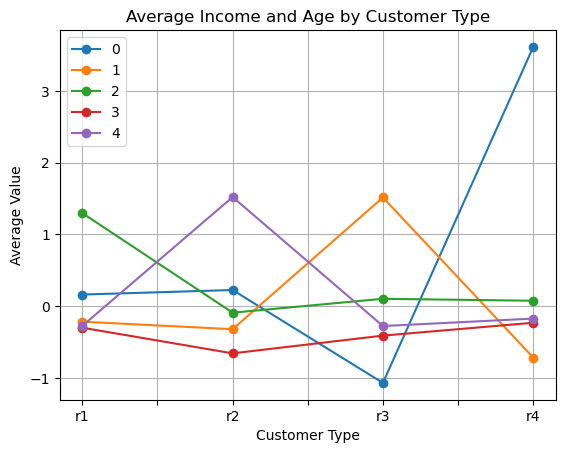

In [384]:
# 绘制折线图
result.T.plot(kind='line', marker='o')
plt.title('Average Income and Age by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Average Value')
plt.xticks(rotation=0)  # 旋转 x 轴标签
plt.legend(loc='best')  # 添加图例，并选择最佳位置
plt.grid(True)  # 添加网格线
plt.show()

In [382]:
aa=df.groupby('Cluster').count()
aa

,r1,r2,r3,r4
Cluster,,,,
0,1924,1924,1924,1924
1,5149,5149,5149,5149
2,4449,4449,4449,4449
3,11094,11094,11094,11094
4,5878,5878,5878,5878
